In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.5.0'

In [3]:
# GPU stuff
physical_devices = tf.config.list_physical_devices('GPU')
print('Physical Devices: {}'.format(physical_devices))
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU memory limitated successfuly!')
except:
    print('Warning! GPU memory could not be limitated!')

Physical Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU memory limitated successfuly!


In [4]:
base_dir = %pwd
data_dir = os.path.join(base_dir, 'Data/g-images-dataset')
BATCH_SIZE = 12
IMG_SIZE = 224
input_shape = (IMG_SIZE,IMG_SIZE,3)
seed = 123
# For reproducibility
np.random.seed(seed)
train_frac = 0.8
elu_alpha = 1.0

In [5]:
input_shape

(224, 224, 3)

### Create dataframe containing the class and path to all available images

In [6]:
metadata_df = pd.DataFrame()
styles_count = 0
for class_dir in os.listdir(data_dir):
    temp_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(temp_path):
        temp_df = pd.DataFrame()
        
        files = np.array([os.path.join(data_dir, class_dir, file) for file in os.listdir(temp_path)])
        # shuffle to divide between train and val
        np.random.shuffle(files)
        temp_df['filename'] = files
        temp_df['class'] = class_dir
        temp_df['class_number'] = str(styles_count)
        styles_count += 1
        
        # assign set
        n_files = files.shape[0]
        n_train = int(train_frac * n_files)
        n_val = n_files - n_train
        temp_df['set'] = np.concatenate((n_train*['train'], n_val*['val']), axis=0)
        
        metadata_df = pd.concat((metadata_df, temp_df), axis=0, ignore_index=True)
        

n_calsses = metadata_df['class'].unique().shape[0]
metadata_df

,filename,class,class_number,set
0,/home/hhughes/Documents/Lorena/Architectural-s...,Queen Anne architecture,0,train
1,/home/hhughes/Documents/Lorena/Architectural-s...,Queen Anne architecture,0,train
2,/home/hhughes/Documents/Lorena/Architectural-s...,Queen Anne architecture,0,train
3,/home/hhughes/Documents/Lorena/Architectural-s...,Queen Anne architecture,0,train
4,/home/hhughes/Documents/Lorena/Architectural-s...,Queen Anne architecture,0,train
...,...,...,...,...
5314,/home/hhughes/Documents/Lorena/Architectural-s...,Georgian architecture,24,val
5315,/home/hhughes/Documents/Lorena/Architectural-s...,Georgian architecture,24,val
5316,/home/hhughes/Documents/Lorena/Architectural-s...,Georgian architecture,24,val
5317,/home/hhughes/Documents/Lorena/Architectural-s...,Georgian architecture,24,val


# Take a look to the data

In [7]:
# which Architectual styles do we have and how many images per style?
classes_df = metadata_df[['class', 'class_number', 'filename']].groupby(['class', 'class_number']).count().reset_index()
classes_df.columns = ['class', 'class_number', 'n_files']
classes_df

,class,class_number,n_files
0,Achaemenid architecture,17,323
1,American Foursquare architecture,12,303
2,American craftsman style,19,169
3,Ancient Egyptian architecture,14,150
4,Art Deco architecture,5,200
5,Art Nouveau architecture,2,165
6,Baroque architecture,10,217
7,Bauhaus architecture,1,223
8,Beaux-Arts architecture,21,233
9,Byzantine architecture,15,202


Number of images:  5319


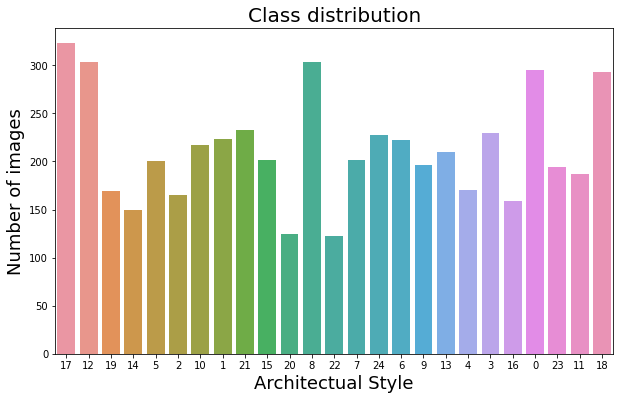

In [8]:
# how many images do we have per class?
plt.figure(figsize=(10,6))
sns.barplot(data=classes_df,
            x='class_number',
            y='n_files')
plt.ylabel('Number of images', fontsize=18)
plt.xlabel('Architectual Style', fontsize=18)
plt.title('Class distribution', fontsize=20)

print('Number of images: ', np.sum(classes_df['n_files'].values))

In [11]:
# set images generatos (to load images from disk)
image_gen = ImageDataGenerator(rescale=1./255)
data_gen = image_gen.flow_from_dataframe(dataframe=metadata_df,
                                               shuffle=True,
                                               directory=None,
                                               x_col='filename', y_col='class',
                                               target_size=(IMG_SIZE,IMG_SIZE),
                                               batch_size=BATCH_SIZE,
                                               #class_mode='categorical'
                                              )

Found 5319 validated image filenames belonging to 25 classes.


In [28]:
class_indices = data_gen.class_indices
class_indices

{'Achaemenid architecture': 0,
 'American Foursquare architecture': 1,
 'American craftsman style': 2,
 'Ancient Egyptian architecture': 3,
 'Art Deco architecture': 4,
 'Art Nouveau architecture': 5,
 'Baroque architecture': 6,
 'Bauhaus architecture': 7,
 'Beaux-Arts architecture': 8,
 'Byzantine architecture': 9,
 'Chicago school architecture': 10,
 'Colonial architecture': 11,
 'Deconstructivism': 12,
 'Edwardian architecture': 13,
 'Georgian architecture': 14,
 'Gothic architecture': 15,
 'Greek Revival architecture': 16,
 'International style': 17,
 'Novelty architecture': 18,
 'Palladian architecture': 19,
 'Postmodern architecture': 20,
 'Queen Anne architecture': 21,
 'Romanesque architecture': 22,
 'Russian Revival architecture': 23,
 'Tudor Revival architecture': 24}

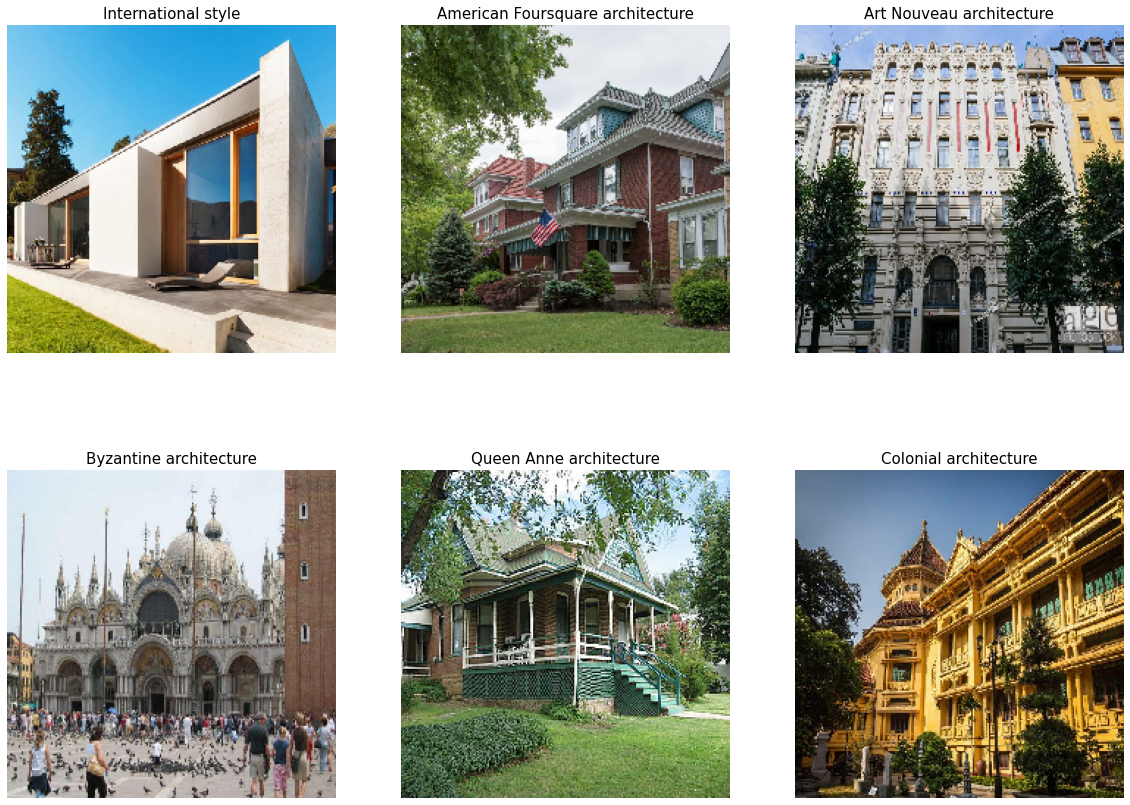

In [29]:
def plot_image(img):
    plt.imshow(img)
    plt.axis('off')

images, labels = data_gen[0]
sample_size = 6
plt.figure(figsize=(20,15))
for i in range(sample_size):
    class_id = np.argmax(labels[i])
    style_name = [key for key in class_indices if class_indices[key] == class_id][0]
    
    plt.subplot(2,3,i+1)
    plot_image(images[i])
    plt.title(style_name, fontsize=15)

## Set train and validation set

In [30]:
# set data augmentation techniques
image_gen_w_augmentation = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True,
                               vertical_flip=True,
                               rotation_range=90,
                               width_shift_range=0.3,
                               height_shift_range=0.3,
                               zoom_range=0.2,
                              )

In [31]:
mask = metadata_df['set'] == 'train'
train_data_gen = image_gen_w_augmentation.flow_from_dataframe(dataframe=metadata_df[mask],
                                         directory=None,
                                         x_col='filename', y_col='class',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                               class_mode='categorical'
                                        )

mask = metadata_df['set'] == 'val'
val_data_gen = image_gen.flow_from_dataframe(dataframe=metadata_df[mask],
                                         directory=None,
                                         x_col='filename', y_col='class',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                             class_mode='categorical'
                                        )

Found 4247 validated image filenames belonging to 25 classes.
Found 1072 validated image filenames belonging to 25 classes.


In [32]:
class_indices = data_gen.class_indices
class_indices

{'Achaemenid architecture': 0,
 'American Foursquare architecture': 1,
 'American craftsman style': 2,
 'Ancient Egyptian architecture': 3,
 'Art Deco architecture': 4,
 'Art Nouveau architecture': 5,
 'Baroque architecture': 6,
 'Bauhaus architecture': 7,
 'Beaux-Arts architecture': 8,
 'Byzantine architecture': 9,
 'Chicago school architecture': 10,
 'Colonial architecture': 11,
 'Deconstructivism': 12,
 'Edwardian architecture': 13,
 'Georgian architecture': 14,
 'Gothic architecture': 15,
 'Greek Revival architecture': 16,
 'International style': 17,
 'Novelty architecture': 18,
 'Palladian architecture': 19,
 'Postmodern architecture': 20,
 'Queen Anne architecture': 21,
 'Romanesque architecture': 22,
 'Russian Revival architecture': 23,
 'Tudor Revival architecture': 24}

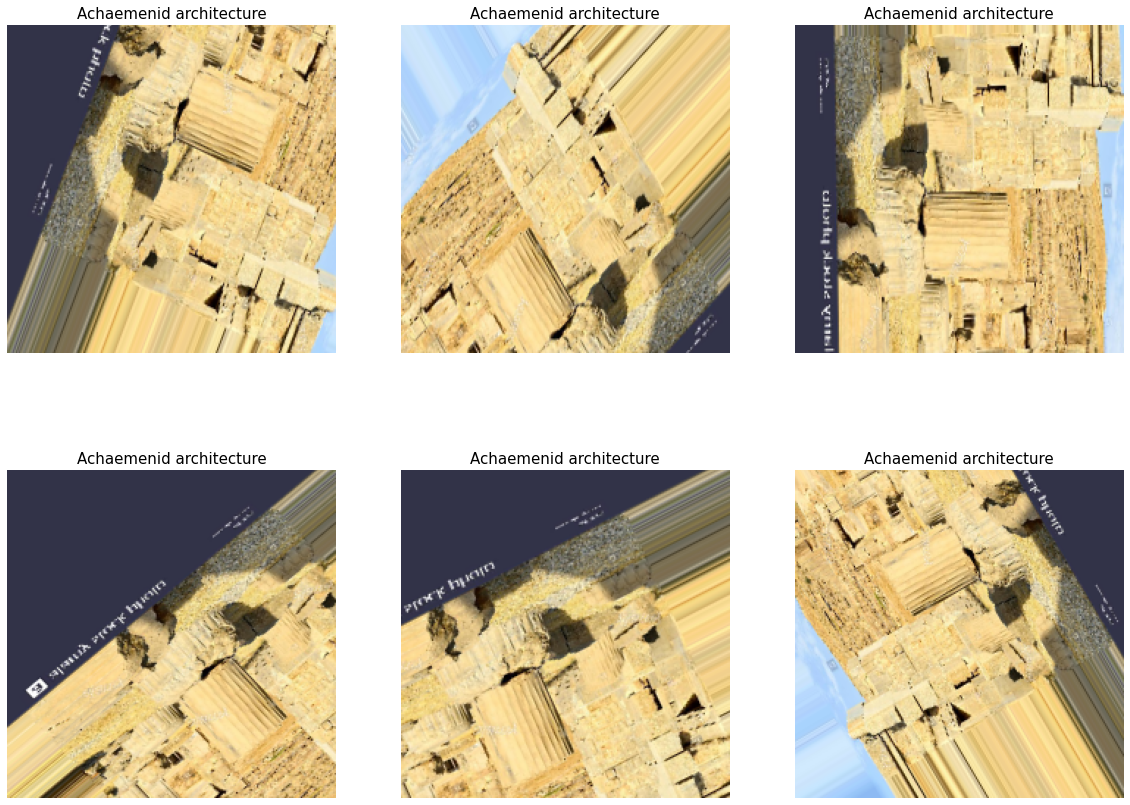

In [34]:
# take a look to an augmented image 
sample_size = 6
plt.figure(figsize=(20,15))
for i in range(sample_size):
    images, labels = train_data_gen[0]
    class_id = np.argmax(labels[0])
    style_name = [key for key in class_indices if class_indices[key] == class_id][0]
    
    plt.subplot(2,3,i+1)
    plot_image(images[0])
    plt.title(style_name, fontsize=15)

# Model

In [35]:
def Resblock2D_v2(x, kernel_size, out_filters, strides, dilation_rate, elu_alpha):
    fx = tf.keras.layers.BatchNormalization()(x)
    fx = tf.keras.layers.ELU(alpha=elu_alpha)(fx)
    fx = tf.keras.layers.Conv2D(out_filters, kernel_size, strides=strides, padding='same', dilation_rate=dilation_rate)(fx)
    fx = tf.keras.layers.BatchNormalization()(fx)
    fx = tf.keras.layers.ELU(alpha=elu_alpha)(fx)
    fx = tf.keras.layers.Conv2D(out_filters, kernel_size, strides=strides, padding='same', dilation_rate=dilation_rate)(fx)
    out = tf.keras.layers.Add()([x,fx])
    return out

def Resblock1D_v2(x, n_units, elu_alpha):
    fx = tf.keras.layers.BatchNormalization()(x)
    fx = tf.keras.layers.ELU(alpha=elu_alpha)(fx)
    fx = tf.keras.layers.Dense(n_units)(fx)
    fx = tf.keras.layers.BatchNormalization()(fx)
    fx = tf.keras.layers.ELU(alpha=elu_alpha)(fx)
    fx = tf.keras.layers.Dense(n_units)(fx)
    out = tf.keras.layers.Add()([x,fx])
    return out

def Custom_model(input_shape, n_calsses, elu_alpha):
    
    input_layer = tf.keras.layers.Input(shape=input_shape)
    
    conv_layers = [32, 64, 128]
    for i, conv_layer in enumerate(conv_layers):
        # Block to increase dims
        if i == 0:
            x = tf.keras.layers.Conv2D(conv_layer, (3,3), padding='same', input_shape=input_shape)(input_layer)
        else:
            x = tf.keras.layers.Conv2D(conv_layer, (3,3), padding='same', input_shape=input_shape)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ELU(alpha=elu_alpha)(x)
        # Residual Block
        x = Resblock2D_v2(x, kernel_size=(3,3), out_filters=conv_layer, strides=(1,1), dilation_rate=(1,1), elu_alpha=elu_alpha)
        x = tf.keras.layers.MaxPooling2D((2,2), strides=(2,2))(x)
    
    # Prediction layers
    #x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    #x = tf.keras.layers.Flatten()(x)
    
    dense_layers = [128]
    for dense_layer in dense_layers:
        # Dense layer to increase or decrease dims
        x = tf.keras.layers.Dense(dense_layer)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ELU(alpha=elu_alpha)(x)
        # Residual block
        x = Resblock1D_v2(x, n_units=dense_layer, elu_alpha=elu_alpha)
    
    # Output layer
    x = tf.keras.layers.Dense(n_calsses)(x)
    
    return tf.keras.Model(inputs=input_layer, outputs=x, name='Custom_model')

In [36]:
model = Custom_model(input_shape, n_calsses, elu_alpha)

In [37]:
model.summary()

Model: "Custom_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
elu (ELU)                       (None, 224, 224, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [38]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

# Set callbacks to save best model and early stopping

In [20]:
callbacks = []

# Save best model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(base_dir, 'Model'),
    monitor='val_loss',
    verbose=0, 
    save_best_only=True,
    save_weights_only=False, 
    mode='min', 
    save_freq='epoch'
)
callbacks.append(checkpoint_cb)

# Early stopping
earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0, 
    patience=20, 
    verbose=0,
    mode='min'
)
callbacks.append(earlystopping_cb)

In [21]:
epochs=100
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE))),
    callbacks=callbacks
)

Epoch 1/100
 11/354 [..............................] - ETA: 4:14 - loss: 3.8896 - accuracy: 0.0909

KeyboardInterrupt: 